# Windstress tau_x

### Tech Preamble

In [1]:
import xarray as xr
import scipy 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
import cmocean.cm as cm 
import cmocean.tools as cmt
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore")

### Load Data

##### Nested Control (nest_ctrl)


In [2]:
%%time
# Define the pattern to match the file names
file_pattern = "/Projekte/fb1-me-foci/moedalen_hiwi/WG10_MO053/outdata/nemo/WG10_MO053_1m_*_grid_U.nc"  # Adjust the path and prefix to match your files

# Load all datasets matching the pattern into a single xarray dataset
ds_nest_ctrl = xr.open_mfdataset(file_pattern)
ds_nest_ctrl = ds_nest_ctrl.set_coords(('nav_lat', 'nav_lon'))


CPU times: user 26.6 s, sys: 4.41 s, total: 31 s
Wall time: 34.1 s


##### Non-Nested Control (no_nest_ctrl)


In [3]:
%%time
# Define the pattern to match the file names
file_pattern = "/Projekte/fb1-me-foci/moedalen_hiwi/FOCI3.0_MO060/outdata/nemo/nemo/FOCI3.0_MO060_1m_*_grid_U.nc"  # Adjust the path and prefix to match your files

# Load all datasets matching the pattern into a single xarray dataset
ds_no_nest_ctrl = xr.open_mfdataset(file_pattern)
ds_no_nest_ctrl = ds_no_nest_ctrl.set_coords(('nav_lat', 'nav_lon'))


CPU times: user 59.7 s, sys: 12.8 s, total: 1min 12s
Wall time: 1min 23s


##### Nested 4xCO2 (nest_4xCO2)


In [4]:
%%time
# Define the pattern to match the file names
file_pattern = '/Projekte/fb1-me-foci/moedalen_hiwi/WG10_MO055/outdata/nemo/nemo/WG10_MO055_1m_*_grid_U.nc'  # Adjust the path and prefix to match your files

# Load all datasets matching the pattern into a single xarray dataset
ds_nest_4xCO2 = xr.open_mfdataset(file_pattern)
ds_nest_4xCO2 = ds_nest_4xCO2.set_coords(('nav_lat', 'nav_lon'))


CPU times: user 9.83 s, sys: 1.16 s, total: 11 s
Wall time: 11.7 s


##### Nested 4xCO2 (no_nest_4xCO2)


In [5]:
%%time
# Define the pattern to match the file names
file_pattern = "/Projekte/fb1-me-foci/moedalen_hiwi/FOCI3.0_MO061/outdata/nemo/nemo/FOCI3.0_MO061_1m_*_grid_U.nc"  # Adjust the path and prefix to match your files

# Load all datasets matching the pattern into a single xarray dataset
ds_no_nest_4xCO2 = xr.open_mfdataset(file_pattern)
ds_no_nest_4xCO2 = ds_no_nest_4xCO2.set_coords(('nav_lat', 'nav_lon'))


CPU times: user 9.04 s, sys: 1.08 s, total: 10.1 s
Wall time: 10.8 s


#### Data Prep

In [6]:
#create list of all 

ds = [ds_nest_ctrl, ds_no_nest_ctrl, ds_nest_4xCO2, ds_no_nest_4xCO2]
title_list = ['nest_ctrl', 'no_nest_ctrl', 'nest_4xCO2', 'no_nest_4xCO2']

In [7]:
#specify area

for i in range(len(ds)):
    ds[i] = ds[i].isel(y = range(210), x = range(400, 700))

In [8]:
ds[0] = ds[0].isel(time_counter = range(1080, 1320))
ds[1] = ds[1].isel(time_counter = range(1080, 1320))
ds[2] = ds[2].isel(time_counter = range(240, 480))
ds[3] = ds[3].isel(time_counter = range(240, 480))

### Plots 

#### Temporal Mean (over all 20 years)

In [9]:
foo = xr.full_like(ds[i], fill_value=np.nan)
foo = [foo, foo, foo, foo];

ds_temp_mean = foo;

for i in range(len(ds)):
    ds_temp_mean[i] = ds[i].sozotaux.mean(dim = 'time_counter')

CPU times: user 36.8 s, sys: 12 s, total: 48.8 s
Wall time: 54.8 s


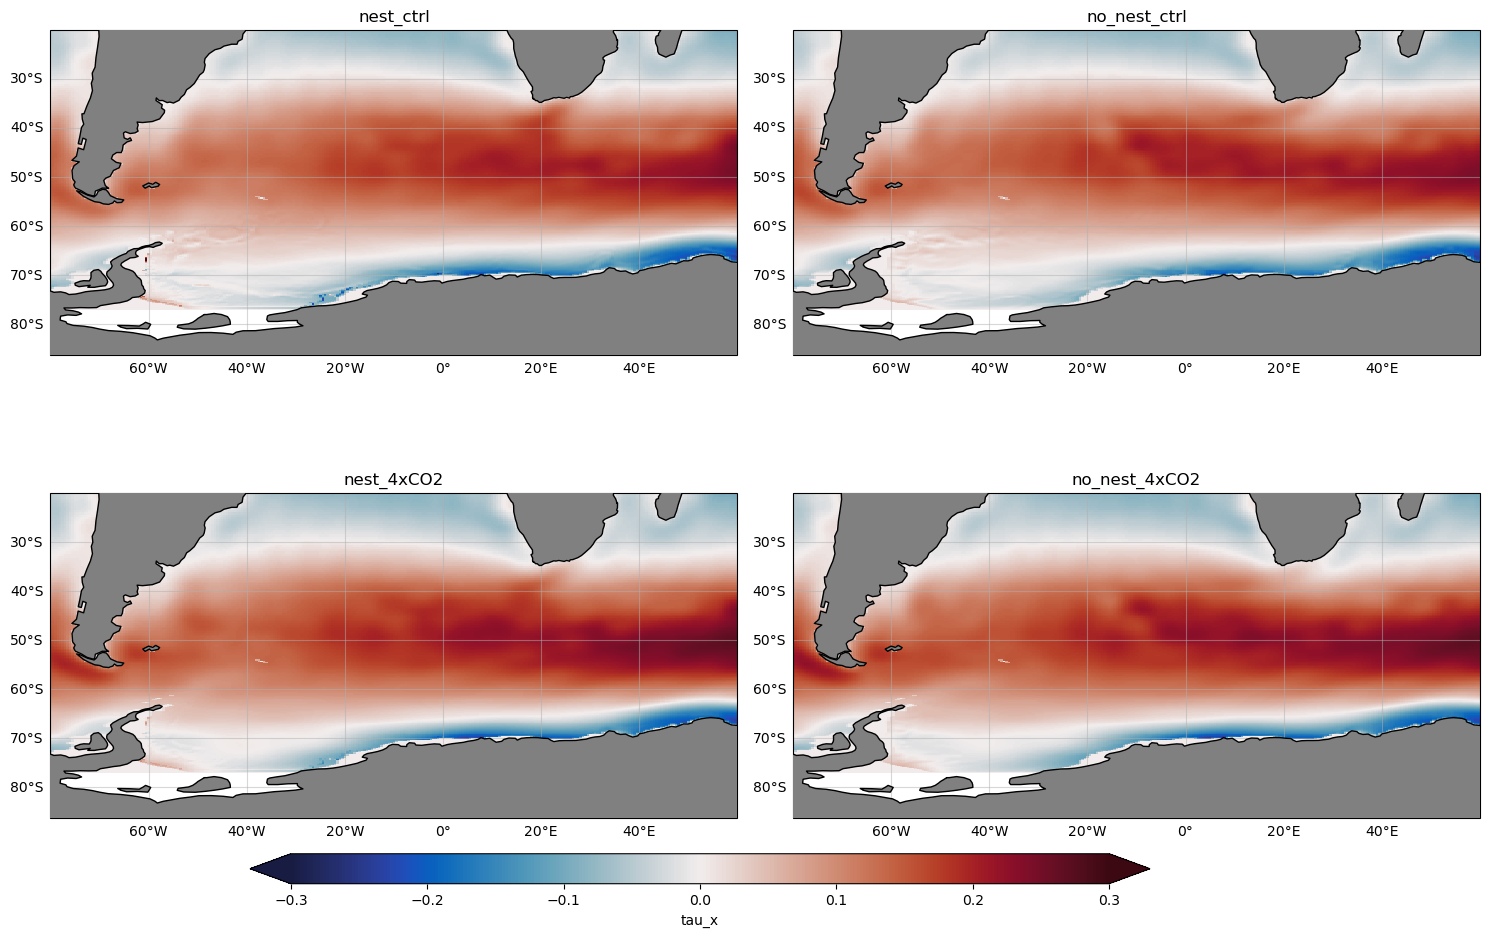

In [10]:
%%time

proj = ccrs.PlateCarree()

fig, ax = plt.subplots(2,2, figsize = (15,10), subplot_kw ={ 'projection' : proj })

for i, ax in enumerate(fig.axes):
    p = ds_temp_mean[i].plot.pcolormesh(x = 'nav_lon', y = 'nav_lat', transform = proj, vmax = 0.3, ax = ax,cmap = cm.balance, add_colorbar=False)


    gl = ax.gridlines(draw_labels = True, alpha = 0.5)
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND, facecolor='gray', edgecolor = '00', zorder = 6)
    ax.set_extent((-80, 60,-80,-20))
    ax.set_title(title_list[i])

cbar_ax = fig.add_axes([0.17, 0.04, 0.6, 0.03]) 
cb = fig.colorbar(p, cax = cbar_ax, orientation ='horizontal', extend = 'both')
cbar_ax.set_xlabel('tau_x [W/m^2]');  # cax == cb.ax:

plt.tight_layout()

#### Differences (to nest_ctrl)

In [11]:
foo = xr.full_like(ds_temp_mean[i], fill_value=np.nan)
foo = [foo, foo, foo, foo];

ds_temp_mean_diff = foo;

for i in range(1, len(ds)):
  ds_temp_mean_diff[i] = ds_temp_mean[i] - ds_temp_mean[0]

CPU times: user 32.2 s, sys: 6.05 s, total: 38.2 s
Wall time: 30.8 s


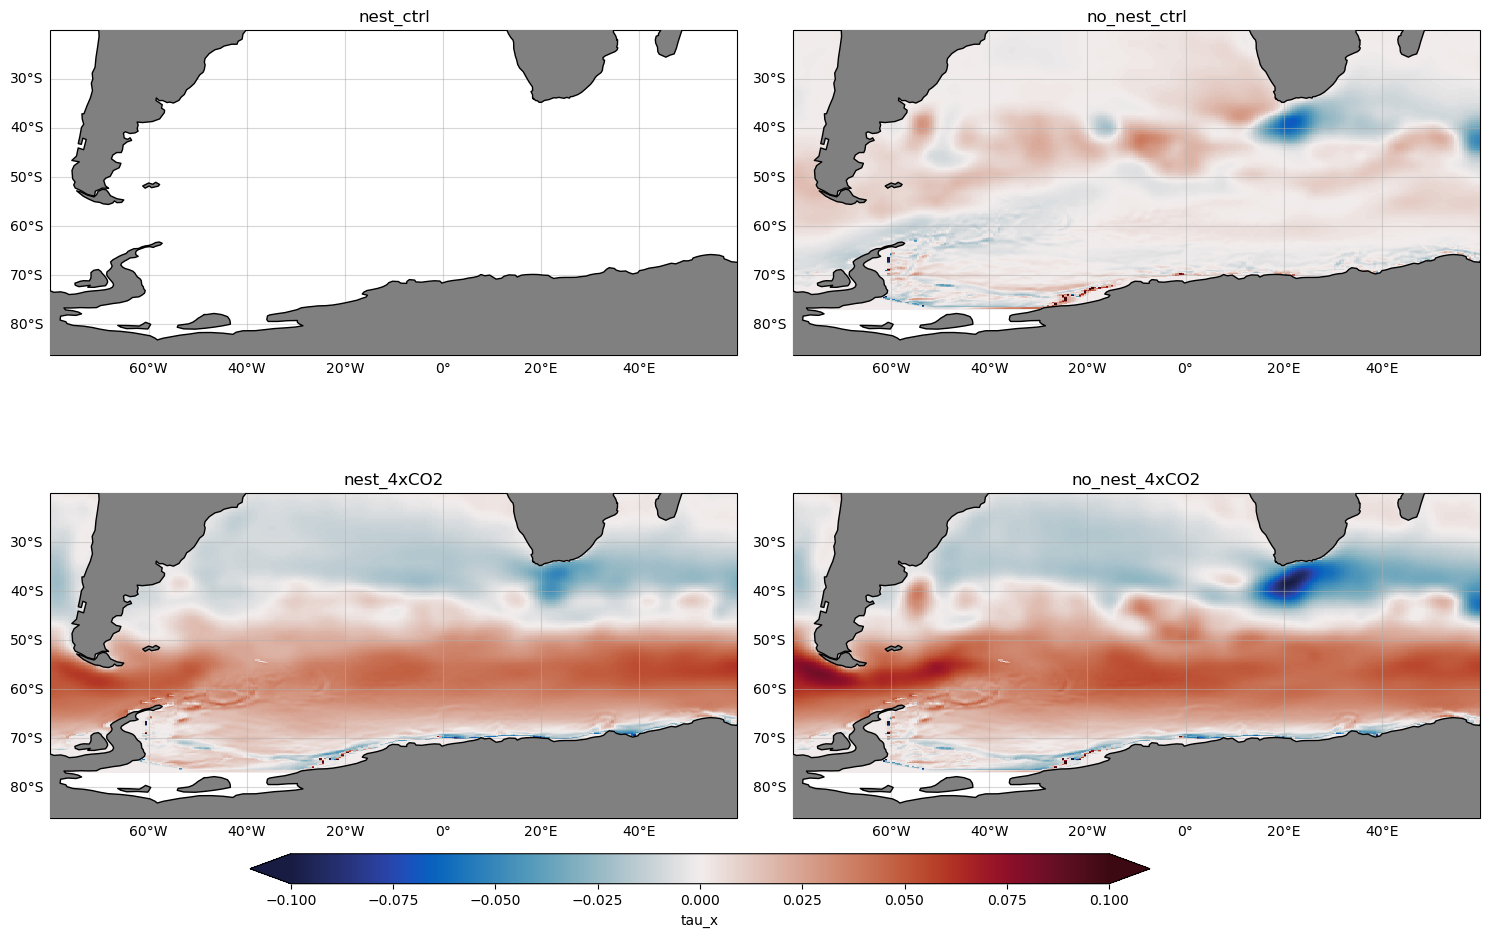

In [12]:
%%time

proj = ccrs.PlateCarree()

fig, ax = plt.subplots(2,2, figsize = (15,10), subplot_kw ={ 'projection' : proj })

for i, ax in enumerate(fig.axes):
    p = ds_temp_mean_diff[i].plot.pcolormesh(x = 'nav_lon', y = 'nav_lat', transform = proj, vmax = 0.1, ax = ax,cmap = cm.balance, add_colorbar=False)


    gl = ax.gridlines(draw_labels = True, alpha = 0.5)
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND, facecolor='gray', edgecolor = '00', zorder = 6)
    ax.set_extent((-80, 60,-80,-20))
    ax.set_title(title_list[i])

cbar_ax = fig.add_axes([0.17, 0.04, 0.6, 0.03]) 
cb = fig.colorbar(p, cax = cbar_ax, orientation ='horizontal', extend = 'both')
cbar_ax.set_xlabel('tau_x [W/m^2]');  # cax == cb.ax:

plt.tight_layout()

Difference between nest and no nest 

→ Stronger Wind Stress in no nest 

→ WHY? 

- Eddy compensation? Disruption of wind patterns??


Increase locally in the 4xCO2 sim by 0.05 W/m^2 ~ 1/6 of total strength! 

#### Spatial Mean 

In [13]:
foo = xr.full_like(ds[i], fill_value=np.nan)
foo = [foo, foo, foo, foo];

ds_spat_mean = foo;

for i in range(len(ds)):
    ds_spat_mean[i] = ds[i].sozotaux.mean(dim = ('x', 'y'))

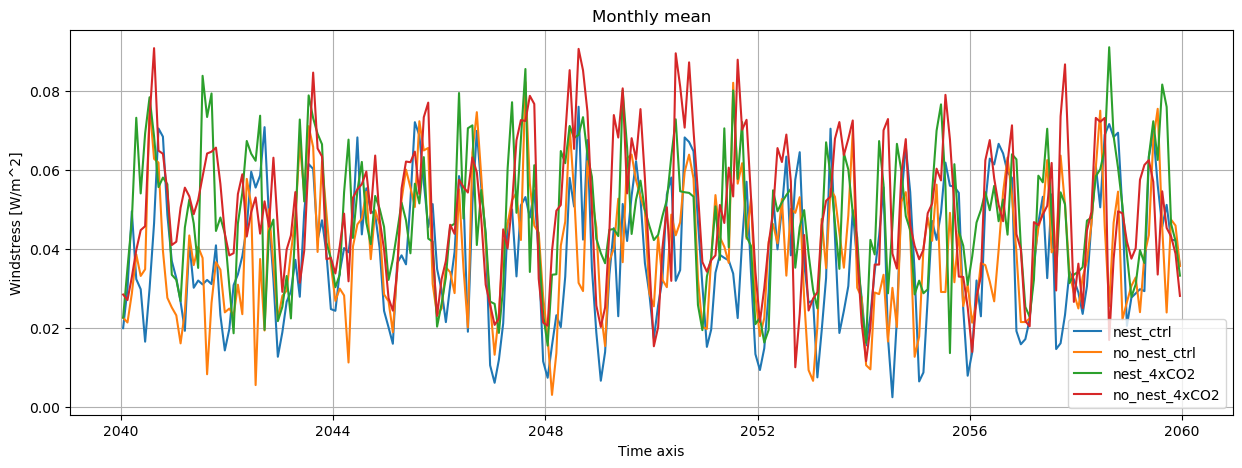

CPU times: user 21.8 s, sys: 3.47 s, total: 25.3 s
Wall time: 20.2 s


In [14]:
%%time

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)

for i in range(len(ds)):
    ds_spat_mean[i].plot(x = 'time_counter', label = title_list[i])

ax.legend()
ax.grid()
ax.set_ylabel('Windstress [W/m^2]')
ax.set_title('Monthly mean')
plt.show()

In [15]:
### calc differences
foo = xr.full_like(ds[i], fill_value=np.nan)
foo = [foo, foo, foo, foo];

ds_spat_mean_diff = foo

for i in range(1, len(ds)):
  ds_spat_mean_diff[i] = ds_spat_mean[i] - ds_spat_mean[0]

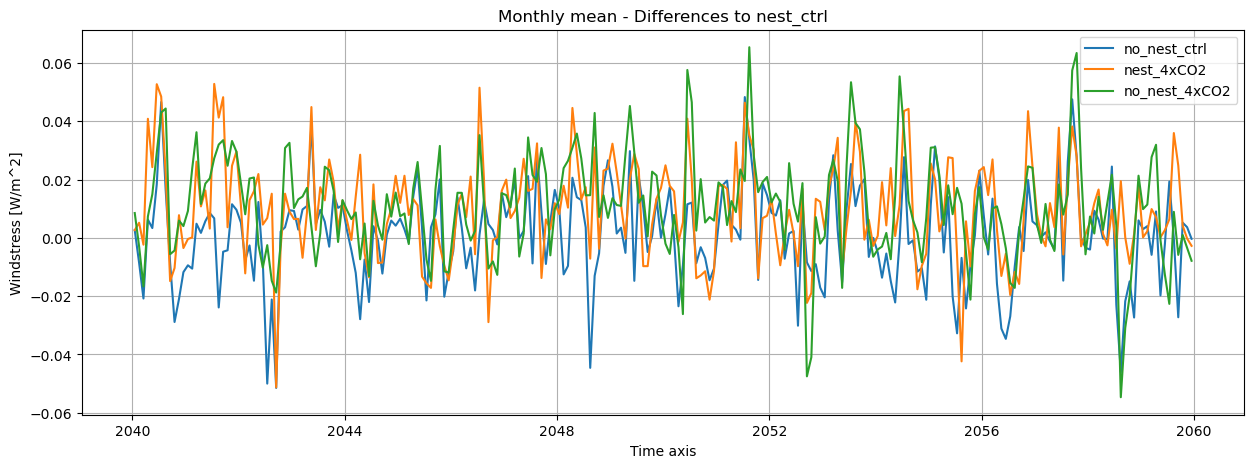

CPU times: user 33.7 s, sys: 5.69 s, total: 39.4 s
Wall time: 32 s


In [16]:
%%time

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)

for i in range(1, len(ds)):
    ds_spat_mean_diff[i].plot(x = 'time_counter', label = title_list[i])

ax.legend()
ax.grid()
ax.set_title('Monthly mean - Differences to nest_ctrl')
ax.set_ylabel('Windstress [W/m^2]')
plt.show()

#### Moving Averages

In [17]:
def moving_average(x, w): #wwindowsize in months
    return np.convolve(x, np.ones(w), 'valid') / w

In [18]:
#get time vector 
time_vec = ds[i].time_counter[1:]

#### 3 Month moving ave

In [19]:
foo = xr.full_like(ds[i], fill_value=np.nan)
foo = [foo, foo, foo, foo];

ds_spat_mean_mov_ave_3 = foo

for i in range(len(ds)):
    ds_spat_mean_mov_ave_3[i] = moving_average(ds_spat_mean[i], 3)

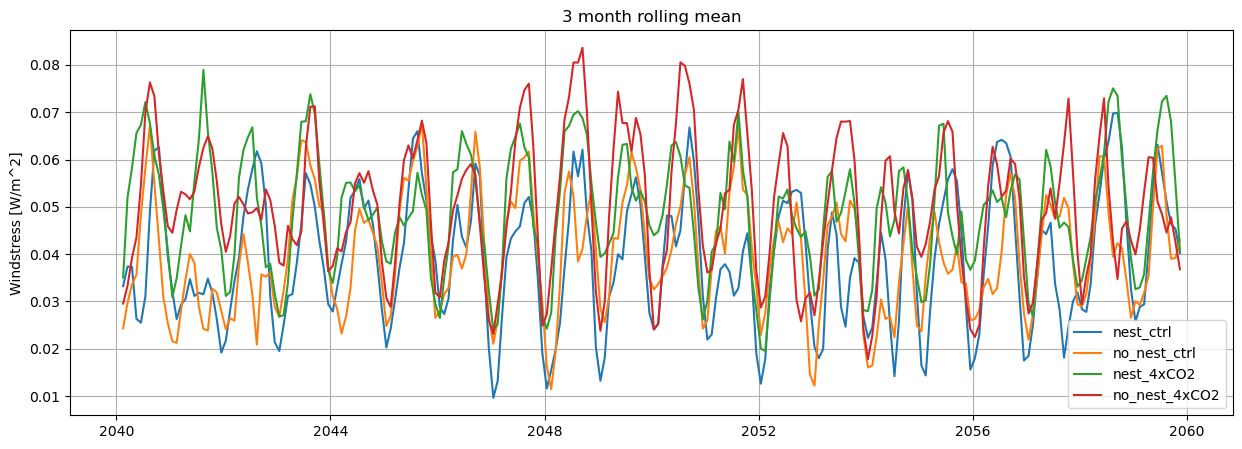

CPU times: user 655 ms, sys: 224 ms, total: 879 ms
Wall time: 608 ms


In [20]:
%%time

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)

for i in range(len(ds)):
    ax.plot(time_vec[:-1], ds_spat_mean_mov_ave_3[i], label = title_list[i])

ax.legend()
ax.grid()
ax.set_title('3 month rolling mean')
ax.set_ylabel('Windstress [W/m^2]')
plt.show()

In [21]:
### calc differences
foo = xr.full_like(ds[i], fill_value=np.nan)
foo = [foo, foo, foo, foo];

ds_spat_mean_mov_ave_3_diff = foo

for i in range(1, len(ds)):
  ds_spat_mean_mov_ave_3_diff[i] = ds_spat_mean_mov_ave_3[i] - ds_spat_mean_mov_ave_3[0]


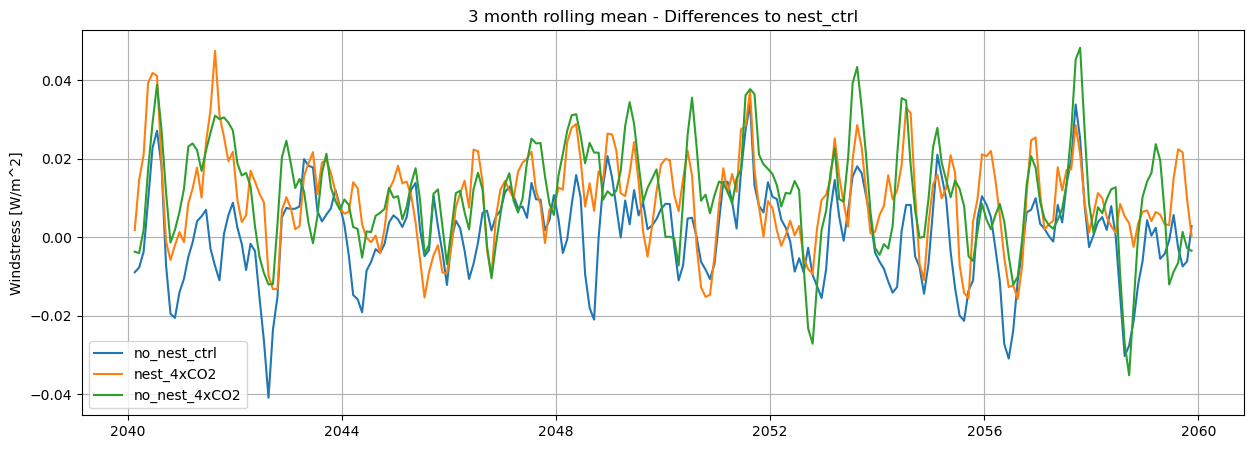

CPU times: user 533 ms, sys: 229 ms, total: 762 ms
Wall time: 491 ms


In [22]:
%%time

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)

for i in range(1, len(ds)):
    ax.plot(time_vec[:-1], ds_spat_mean_mov_ave_3_diff[i], label = title_list[i])

ax.legend()
ax.grid()
ax.set_title('3 month rolling mean - Differences to nest_ctrl')
ax.set_ylabel('Windstress [W/m^2]')
plt.show()

#### 5 Months moving ave

In [23]:
foo = xr.full_like(ds[i], fill_value=np.nan)
foo = [foo, foo, foo, foo];

ds_spat_mean_mov_ave_5 = foo

for i in range(len(ds)):
    ds_spat_mean_mov_ave_5[i] = moving_average(ds_spat_mean[i], 5)

CPU times: user 40.8 ms, sys: 3.82 ms, total: 44.6 ms
Wall time: 41.5 ms


<function matplotlib.pyplot.show(close=None, block=None)>

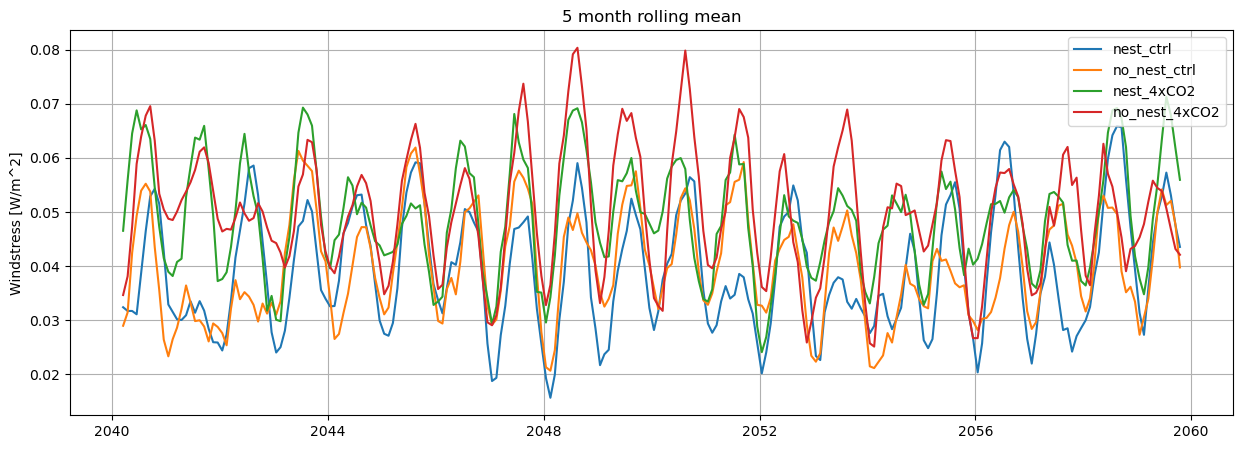

In [24]:
%%time

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)

for i in range(len(ds)):
    ax.plot(time_vec[1:-2], ds_spat_mean_mov_ave_5[i], label = title_list[i])

ax.legend()
ax.grid()
ax.set_title('5 month rolling mean')
ax.set_ylabel('Windstress [W/m^2]')
plt.show

In [25]:
### calc differences
foo = xr.full_like(ds[i], fill_value=np.nan)
foo = [foo, foo, foo, foo];

ds_spat_mean_mov_ave_5_diff = foo

for i in range(1, len(ds)):
  ds_spat_mean_mov_ave_5_diff[i] = ds_spat_mean_mov_ave_5[i] - ds_spat_mean_mov_ave_5[0]


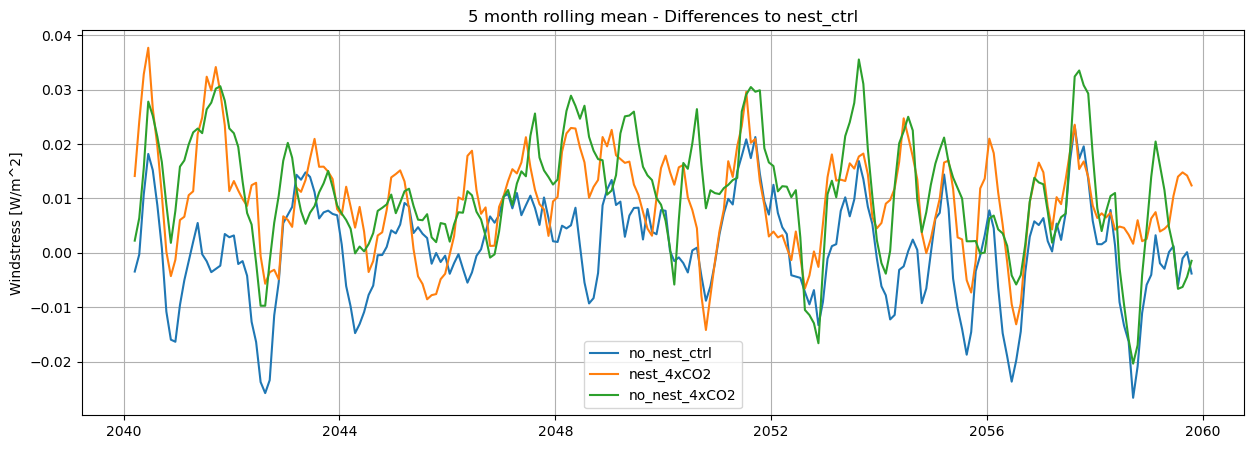

CPU times: user 551 ms, sys: 239 ms, total: 790 ms
Wall time: 519 ms


In [26]:
%%time

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)

for i in range(1, len(ds)):
    ax.plot(time_vec[1:-2], ds_spat_mean_mov_ave_5_diff[i], label = title_list[i])

ax.legend()
ax.grid()
ax.set_title('5 month rolling mean - Differences to nest_ctrl')
ax.set_ylabel('Windstress [W/m^2]')
plt.show()

#### 12 Month Mean

In [27]:
foo = xr.full_like(ds[i], fill_value=np.nan)
foo = [foo, foo, foo, foo];

ds_ann_mean = foo

for i in range(len(ds)):
    ds_ann_mean[i] = ds_spat_mean[i].resample(time_counter ='1Y').mean()

In [28]:
time_vec_ann = time_vec.resample(time_counter ='1Y').mean()

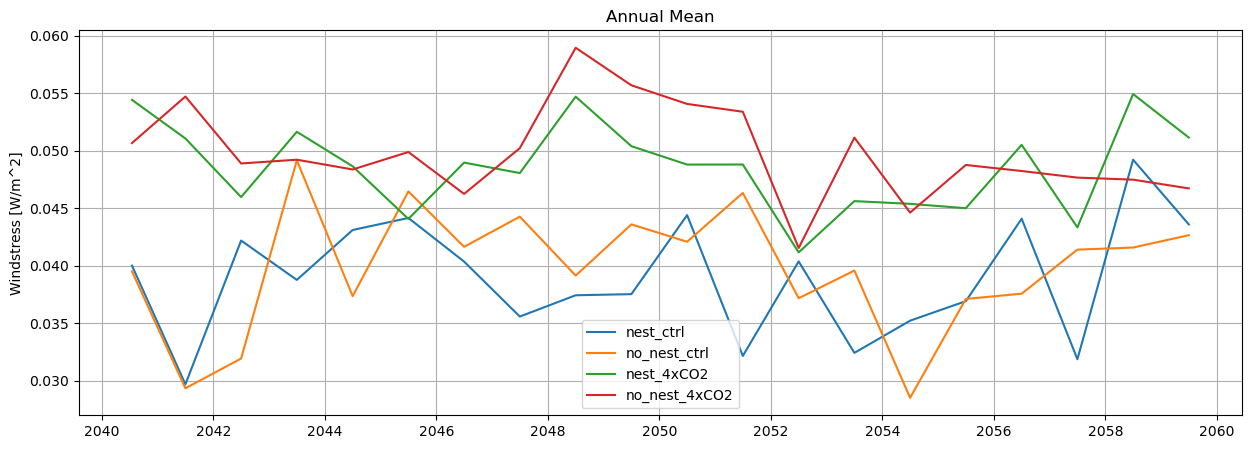

CPU times: user 20.2 s, sys: 3.26 s, total: 23.4 s
Wall time: 18.5 s


In [29]:
%%time

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)

for i in range(len(ds)):
    ax.plot(time_vec_ann, ds_ann_mean[i], label = title_list[i])

ax.legend()
ax.grid()
ax.set_title('Annual Mean')
ax.set_ylabel('Windstress [W/m^2]')
plt.show()

In [30]:
### calc differences
foo = xr.full_like(ds[i], fill_value=np.nan)
foo = [foo, foo, foo, foo];

ds_ann_mean_diff = foo

for i in range(1, len(ds)):
    ds_ann_mean_diff[i] = ds_ann_mean[i] - ds_ann_mean[0]


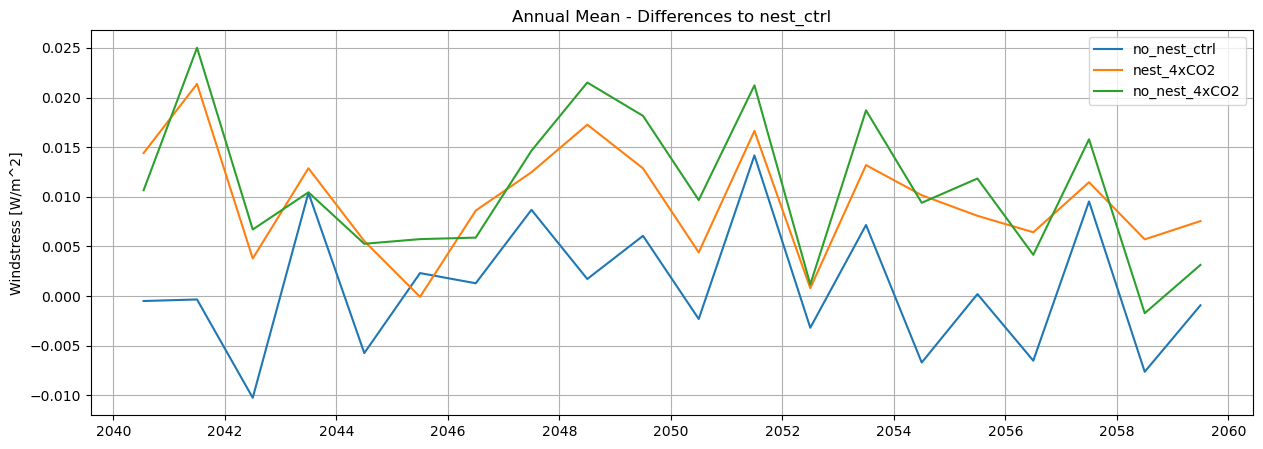

CPU times: user 29.8 s, sys: 4.81 s, total: 34.6 s
Wall time: 27.3 s


In [31]:
%%time

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)

for i in range(1, len(ds)):
    ax.plot(time_vec_ann, ds_ann_mean_diff[i], label = title_list[i])

ax.legend()
ax.grid()
ax.set_title('Annual Mean - Differences to nest_ctrl')
ax.set_ylabel('Windstress [W/m^2]')
plt.show()

#### Remarks

No Trend

Seasonal and to decadal variability 

Differences to no nest



